In [1]:
import numpy as np
import pandas as pd

# Using plotly.express
import plotly.express as px
import talib

import plotly.graph_objects as go

In [151]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [354]:
df = pd.read_csv('/home/usman/Downloads/BB.csv')

df.Date = pd.to_datetime(df.Date)

df.sort_values(by='Date', inplace=True)

# df = df[df.Date > pd.to_datetime('2015-01-01')]

In [355]:
df['RSI'] = talib.RSI(df['Adj Close'])

In [356]:
df['sma_80'] = talib.SMA(df['Adj Close'], timeperiod=80)

df['stdev_80'] = talib.STDDEV(df['Adj Close'], timeperiod=80, nbdev=1)

df['nsigma'] = (df['Adj Close'] - df['sma_80'])/df['stdev_80']

def slope_R2_adj(y):
    y = np.log(y)
    x = np.arange(len(y))

    sum_y = sum(y)
    sum_x = sum(x)
    sum_xy = sum(x*y)
    sum_x2 = sum(x**2)
    sum_y2 = sum(y**2)

    l = 21

    m = (l*sum_xy - sum_x*sum_y)/(l*sum_x2 - sum_x**2)

    r_squared = (l*sum_xy - sum_x*sum_y)/(np.sqrt( (l*sum_x2 - sum_x**2) * (l*sum_y2 - sum_y**2 ) ))

    return m*r_squared**2

df['slope_R2_adj'] = df['Close'].rolling(21).apply(slope_R2_adj)

In [357]:
df = df[df.Date > pd.to_datetime('2010-01-01')]

In [358]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,sma_80,stdev_80,nsigma,slope_R2_adj
2347,2010-01-04,68.160004,68.230003,65.639999,65.930000,65.930000,20035800,52.701396,66.522000,7.441268,-0.079556,0.004288
2348,2010-01-05,66.959999,67.169998,64.930000,65.800003,65.800003,22082200,52.281616,66.357625,7.308986,-0.076293,0.002796
2349,2010-01-06,65.730003,65.809998,64.400002,65.400002,65.400002,16697900,50.937158,66.183000,7.161405,-0.109336,0.001447
2350,2010-01-07,65.389999,66.260002,64.940002,65.300003,65.300003,11302000,50.586927,65.981625,6.953894,-0.098020,0.000566
2351,2010-01-08,65.059998,65.849998,64.860001,65.459999,65.459999,10639100,51.165483,65.760625,6.680650,-0.045000,0.000124
...,...,...,...,...,...,...,...,...,...,...,...,...
5025,2020-08-24,4.800000,4.840000,4.740000,4.790000,4.790000,2528200,49.136154,4.815375,0.292481,-0.086758,0.000058
5026,2020-08-25,4.800000,4.880000,4.770000,4.780000,4.780000,2470300,48.554807,4.824250,0.280244,-0.157898,0.000007
5027,2020-08-26,4.830000,5.210000,4.800000,5.080000,5.080000,7741000,62.781382,4.834500,0.274353,0.894831,0.000034
5028,2020-08-27,5.120000,5.170000,4.970000,5.030000,5.030000,3544300,59.812578,4.844000,0.267720,0.694756,0.000251


In [359]:
df.set_index('Date', inplace=True)

In [360]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,sma_80,stdev_80,nsigma,slope_R2_adj
Date,,,,,,,,,,,
2010-01-04,68.160004,68.230003,65.639999,65.930000,65.930000,20035800,52.701396,66.522000,7.441268,-0.079556,0.004288
2010-01-05,66.959999,67.169998,64.930000,65.800003,65.800003,22082200,52.281616,66.357625,7.308986,-0.076293,0.002796
2010-01-06,65.730003,65.809998,64.400002,65.400002,65.400002,16697900,50.937158,66.183000,7.161405,-0.109336,0.001447
2010-01-07,65.389999,66.260002,64.940002,65.300003,65.300003,11302000,50.586927,65.981625,6.953894,-0.098020,0.000566
2010-01-08,65.059998,65.849998,64.860001,65.459999,65.459999,10639100,51.165483,65.760625,6.680650,-0.045000,0.000124


In [361]:
# look ahead 5 days to see if it is a good day to buy, hold or sell

df['actions'] = None

In [362]:
df_actions = df['actions']

In [363]:
df_actions = df_actions.to_frame()

df_actions.head()

,actions
Date,
2010-01-04,None
2010-01-05,None
2010-01-06,None
2010-01-07,None
2010-01-08,None


In [364]:
# move_ahead_long = 7
# move_ahead_short = 5
# max_date = max(df.index)
# for index, row in df.iterrows():
#     if index + pd.DateOffset(days=move_ahead_long) <  max_date:
#         # what is the current status        
#         status = df_actions.loc[index]['actions']
#         # we don't own any stocks
#         if status == None:
#             # is the price going to be higher 5 days from today
#             while index + pd.DateOffset(days=move_ahead_long) not in df.index:
#                 move_ahead_long +=1
#             if row['Adj Close'] < df.loc[index + pd.DateOffset(days=move_ahead_long)]['Adj Close']:
#                 # buy today
#                 df_actions.loc[index, 'actions'] = 'BUY'
#                 # Going forward I am holding
#                 df_actions.loc[df_actions.index > index, 'actions'] = 'HOLD'
                
#             # else don't buy and stay as you are
#         # we bought yesterday so in a holding pattern today
#         elif status == 'HOLD':
#             # check if the price is going to lower tomorrow
#             while index + pd.DateOffset(days=move_ahead_short) not in df.index:
#                 move_ahead_short +=1
#             # sell if price is going to be lower tomorrow
#             if row['Adj Close'] > df.loc[index + pd.DateOffset(days=move_ahead_short)]['Adj Close']:
#                 df_actions.loc[index, 'actions'] = 'SELL'
#                 # going forward I am out of stocks
#                 df_actions.loc[df_actions.index > index, 'actions'] = None
#             # else keep holding
                
#     # reset move ahead time frames
#     move_ahead_long = 7
#     move_ahead_short = 5
    

In [365]:
df['actions'] = None

df_actions = df['actions']
df_actions = df_actions.to_frame()

move_ahead_long = 30
move_ahead_short = 14
max_date = max(df.index)

start = min(df.index)

while start < max_date - pd.DateOffset(days=move_ahead_long):
    # what is the current status        
    status = df_actions.loc[start]['actions']
    # we don't own any stocks
    if status == None:
        # is the price going to be higher 5 days from today
        while start + pd.DateOffset(days=move_ahead_long) not in df.index:
            move_ahead_long +=1
        if df.loc[start]['Adj Close'] < df.loc[start + pd.DateOffset(days=move_ahead_long)]['Adj Close']:
#             print('here')
            # buy today
            df_actions.loc[start, 'actions'] = 'BUY'
            # Going forward I am holding
            df_actions.loc[df_actions.index > start, 'actions'] = 'HOLD'
        # move things ahead
        start = start + pd.DateOffset(days=move_ahead_long)
                
        # else don't buy and stay as you are
    # we bought yesterday so in a holding pattern today
    elif status == 'HOLD':
        # check if the price is going to lower tomorrow
        while start + pd.DateOffset(days=move_ahead_short) not in df.index:
            move_ahead_short +=1
        # sell if price is going to be lower tomorrow
        if df.loc[start]['Adj Close'] > df.loc[start + pd.DateOffset(days=move_ahead_short)]['Adj Close']:
            df_actions.loc[start, 'actions'] = 'SELL'
            # going forward I am out of stocks
            df_actions.loc[df_actions.index > start, 'actions'] = None
        # else keep holding
        
        start = start + pd.DateOffset(days=move_ahead_short)
    
#     print(start)
                
    # reset move ahead time frames
    move_ahead_long = 30
    move_ahead_short = 14

In [366]:
df['actions'] = None

df_actions = df['actions']
df_actions = df_actions.to_frame()

long = 30
short = 15

move_ahead_long = long
move_ahead_short = short
max_date = max(df.index)

start = min(df.index)

while start < max_date - pd.DateOffset(days=move_ahead_long):
    # what is the current status        
    status = df_actions.loc[start]['actions']
    # we don't own any stocks
    if status == None:
        # is the price going to be higher by 5% N days from today
        while start + pd.DateOffset(days=move_ahead_long) not in df.index:
            move_ahead_long +=1
        if df.loc[start]['Adj Close']*1.05 < df.loc[start + pd.DateOffset(days=move_ahead_long)]['Adj Close']:
#             print('here')
            # buy today
            df_actions.loc[start, 'actions'] = 'BUY'
            # Going forward I am holding
            df_actions.loc[df_actions.index > start, 'actions'] = 'HOLD'
        # move things ahead
        start = start + pd.DateOffset(days=move_ahead_long)
                
        # else don't buy and stay as you are
    # we bought yesterday so in a holding pattern today
    elif status == 'HOLD':
        # check if the price is going to lower by 5% N days from now
        while start + pd.DateOffset(days=move_ahead_short) not in df.index:
            move_ahead_short +=1
        # sell if price is going to be lower tomorrow
        if df.loc[start]['Adj Close'] > 0.98*df.loc[start + pd.DateOffset(days=move_ahead_short)]['Adj Close']:
            df_actions.loc[start, 'actions'] = 'SELL'
            # going forward I am out of stocks
            df_actions.loc[df_actions.index > start, 'actions'] = None
        # else keep holding
        
        start = start + pd.DateOffset(days=move_ahead_short)
    
#     print(start)
                
    # reset move ahead time frames
    move_ahead_long = long
    move_ahead_short = short

In [367]:
df['actions'] = df_actions

In [368]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI,sma_80,stdev_80,nsigma,slope_R2_adj,actions
Date,,,,,,,,,,,,
2010-01-04,68.160004,68.230003,65.639999,65.930000,65.930000,20035800,52.701396,66.522000,7.441268,-0.079556,0.004288,None
2010-01-05,66.959999,67.169998,64.930000,65.800003,65.800003,22082200,52.281616,66.357625,7.308986,-0.076293,0.002796,None
2010-01-06,65.730003,65.809998,64.400002,65.400002,65.400002,16697900,50.937158,66.183000,7.161405,-0.109336,0.001447,None
2010-01-07,65.389999,66.260002,64.940002,65.300003,65.300003,11302000,50.586927,65.981625,6.953894,-0.098020,0.000566,None
2010-01-08,65.059998,65.849998,64.860001,65.459999,65.459999,10639100,51.165483,65.760625,6.680650,-0.045000,0.000124,None


In [369]:
df_actions.head()

,actions
Date,
2010-01-04,None
2010-01-05,None
2010-01-06,None
2010-01-07,None
2010-01-08,None


In [370]:
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(x=df.index, y=df['Adj Close'],
                    mode='lines',
                    name='markers'))
fig.add_trace(go.Scatter(x=df[df['actions'] == 'BUY'].index, y=df[df['actions'] == 'BUY']['Adj Close'],
                    mode='markers',
                    name='BUY'))

fig.add_trace(go.Scatter(x=df[df['actions'] == 'SELL'].index, y=df[df['actions'] == 'SELL']['Adj Close'],
                    mode='markers',
                    name='SELL'))

# fig.add_trace(go.Scatter(x=df[df['actions'] == 'HOLD'].index, y=df[df['actions'] == 'HOLD']['Adj Close'],
#                     mode='markers',
#                     name='HOLD'))
# fig.add_trace(go.Scatter(x=random_x, y=random_y1,
#                     mode='lines+markers',
#                     name='lines+markers'))
# fig.add_trace(go.Scatter(x=random_x, y=random_y2,
#                     mode='lines',
#                     name='lines'))

fig.show()

In [371]:
df['stockNumbers'] = 0

In [372]:
cash = 10000

for index, row in df.iterrows():
    if row['actions'] == 'BUY':
        stockNumbers = cash // row['Adj Close']
        cash = cash - stockNumbers * row['Adj Close']
        df.loc[df.index >= index, 'stockNumbers'] = stockNumbers
    elif row['actions'] == 'SELL':
        cash = cash + stockNumbers * row['Adj Close']
        df.loc[df.index >= index, 'stockNumbers'] = 0

cash = cash + df.loc[max(df.index)]['stockNumbers']*df.loc[max(df.index)]['Adj Close']

In [373]:
cash

5105754.828451002

In [374]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,RSI,sma_80,stdev_80,nsigma,slope_R2_adj,actions,stockNumbers
Date,,,,,,,,,,,,,
2020-08-24,4.80,4.84,4.74,4.79,4.79,2528200,49.136154,4.815375,0.292481,-0.086758,0.000058,None,0.0
2020-08-25,4.80,4.88,4.77,4.78,4.78,2470300,48.554807,4.824250,0.280244,-0.157898,0.000007,None,0.0
2020-08-26,4.83,5.21,4.80,5.08,5.08,7741000,62.781382,4.834500,0.274353,0.894831,0.000034,None,0.0
2020-08-27,5.12,5.17,4.97,5.03,5.03,3544300,59.812578,4.844000,0.267720,0.694756,0.000251,None,0.0
2020-08-28,5.13,5.30,5.10,5.23,5.23,3987300,66.613479,4.853250,0.268113,1.405192,0.000562,None,0.0


In [375]:
df.actions.unique()

array([None, 'BUY', 'HOLD', 'SELL'], dtype=object)

In [376]:
df.groupby('actions').size()

actions
BUY      29
HOLD    811
SELL     29
dtype: int64

In [377]:
len(df)

2683

In [378]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [379]:
col_names = ['RSI', 'nsigma', 'slope_R2_adj']
X = df[(df['actions'] == 'BUY') | (df['actions'] == 'SELL')][col_names].values.tolist()
y = df[(df['actions'] == 'BUY') | (df['actions'] == 'SELL')]['actions'].values.tolist()

In [380]:
X

[[25.221351958946137, -2.3742868130705177, -0.0064679437266895925],
 [42.56857059344829, -1.1638373126210415, 0.00024411953636478388],
 [40.98227432424515, -1.3871420933957628, -0.000441273359786204],
 [71.05369611823433, 2.147037105199506, 0.004022974436549766],
 [45.68139207068135, 0.8521101602539731, -1.667480729355817e-06],
 [60.400776242114105, 1.9958349722805384, 0.005077255451914931],
 [25.941723124371237, -1.491294787618292, -0.008232345244336215],
 [63.11275144429081, 0.11494519071393457, 0.014602757062760735],
 [27.748727942269912, -1.7023918586015532, -0.00761381059099878],
 [49.03875314539792, -0.7469025239656493, 0.0008721931896441043],
 [50.0592037903814, -0.9973283375619283, -1.8266874637512248e-05],
 [51.11547349609887, -0.3413346680176388, 0.00012123728004013478],
 [33.787430075689166, -1.2046215979847952, 5.231849203300638e-06],
 [81.12624132827807, 4.432629751938306, 0.010294857801140563],
 [47.28667009563959, 0.8323920137454338, -0.0025186784792193854],
 [59.2531147

In [381]:
y

['BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL',
 'BUY',
 'SELL']

In [382]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X,y)

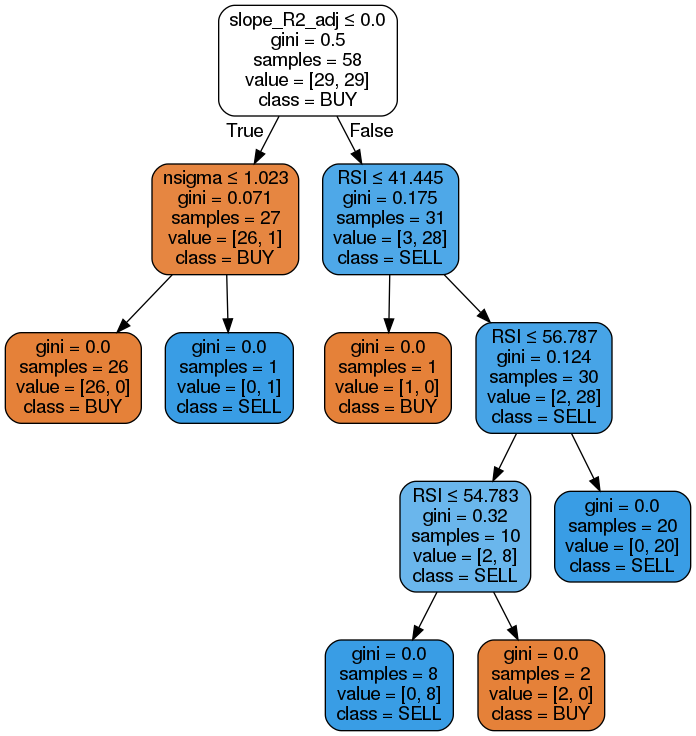

In [383]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['BUY','SELL'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('BB.png')
Image(graph.create_png())

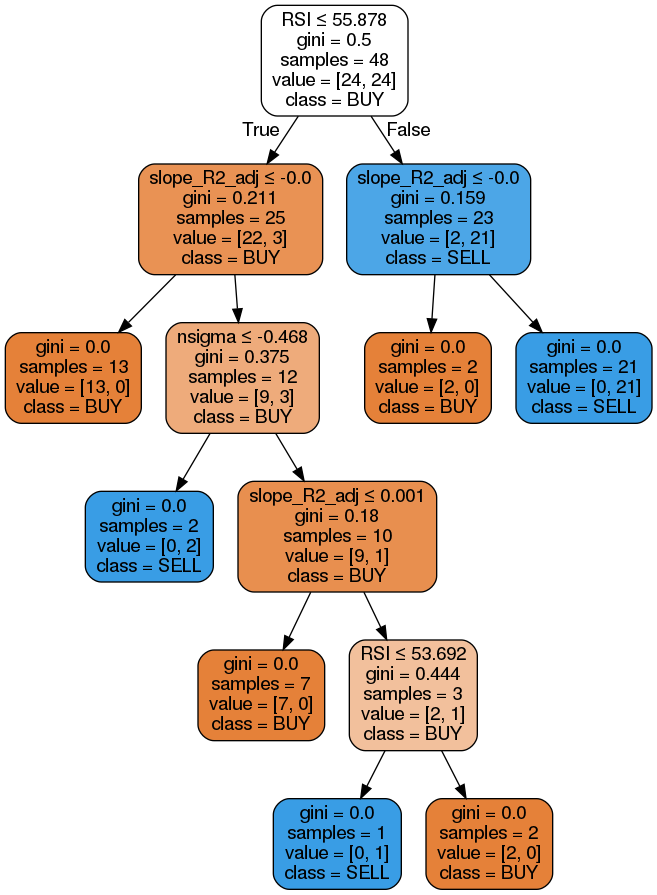

In [353]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['BUY','SELL'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('FE.png')
Image(graph.create_png())

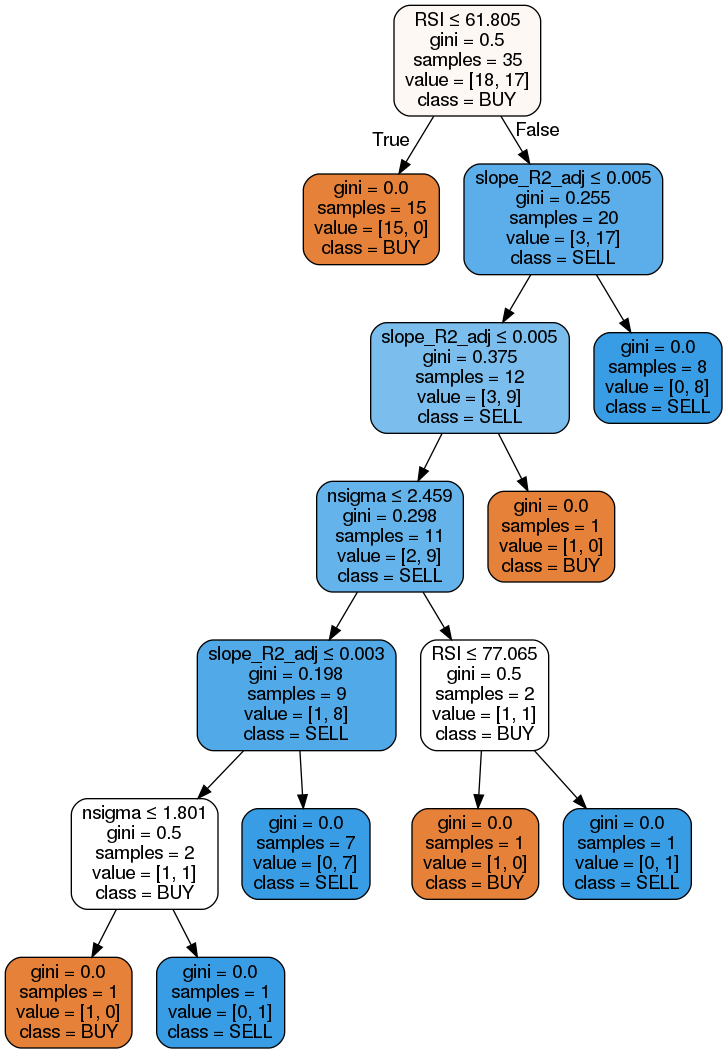

In [318]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['BUY','SELL'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('GOOG.png')
Image(graph.create_png())

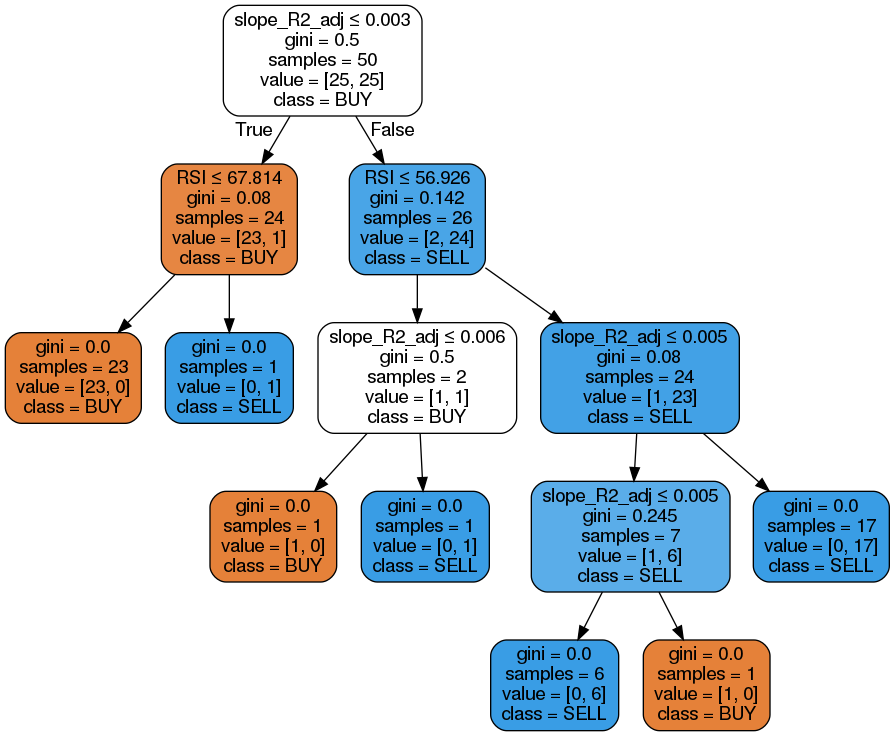

In [288]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['BUY','SELL'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('NVDA.png')
Image(graph.create_png())

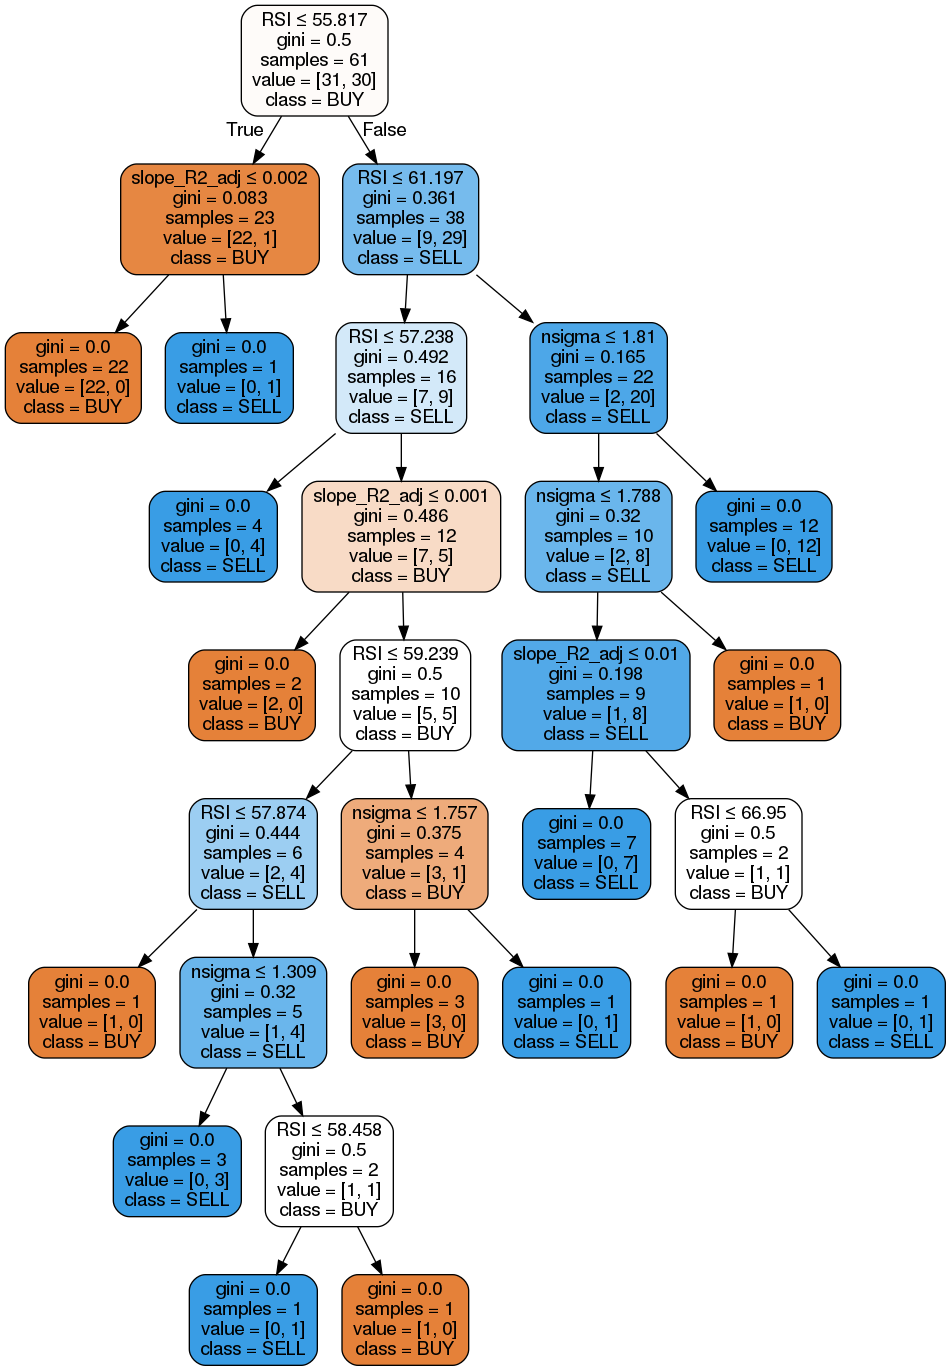

In [258]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['BUY','SELL'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('AMD.png')
Image(graph.create_png())

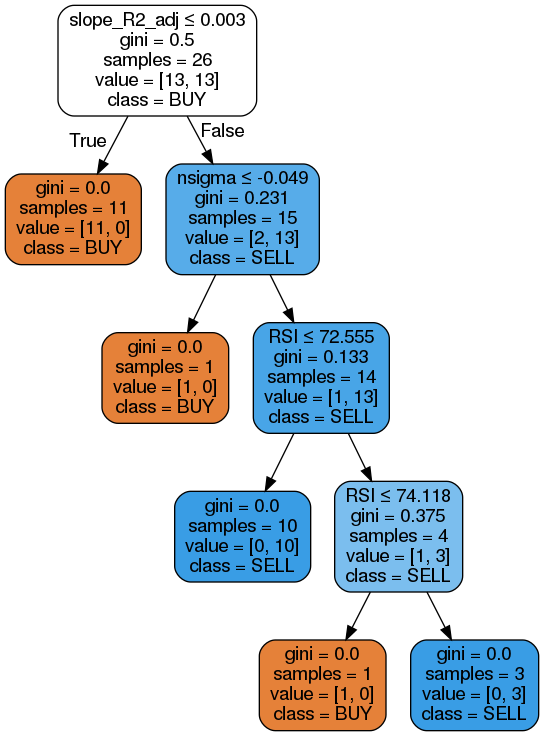

In [228]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['BUY','SELL'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('INTC.png')
Image(graph.create_png())

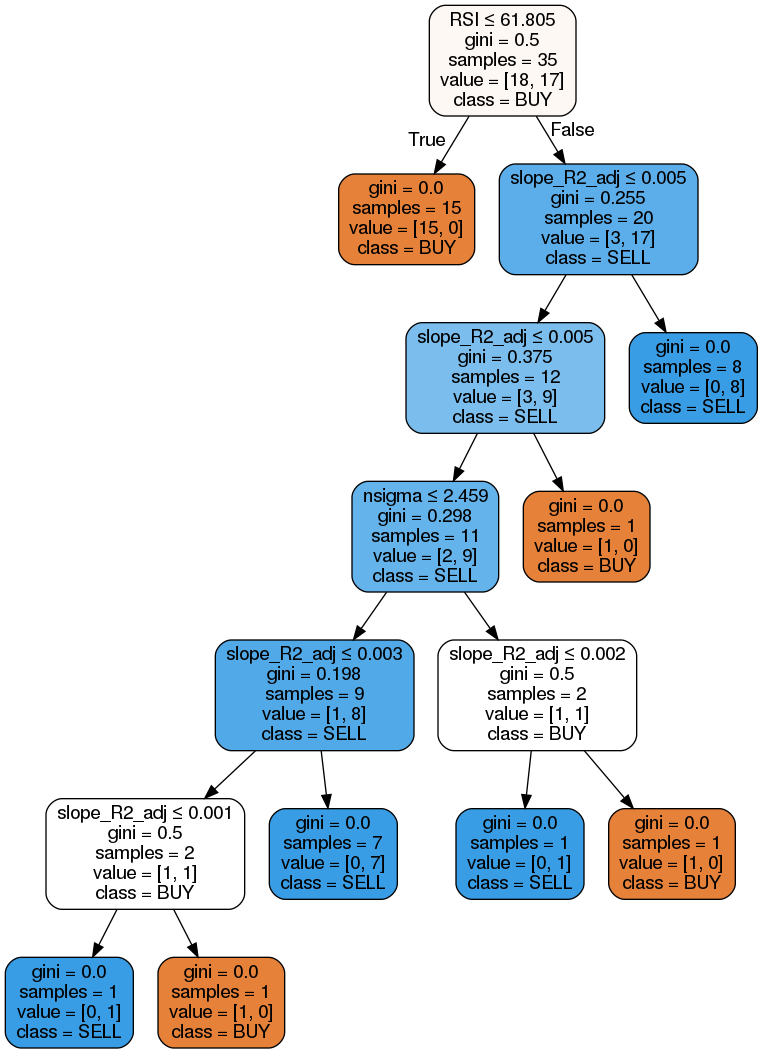

In [198]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['BUY','SELL'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('AAPL.png')
Image(graph.create_png())

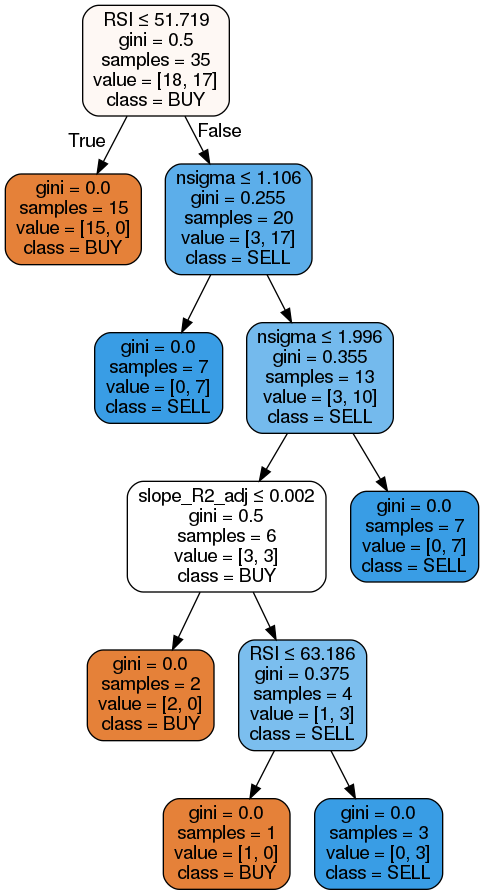

In [153]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = col_names,class_names=['BUY','SELL'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())